In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files


In [8]:
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_sort = merged_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
reg_group = merge_sort.groupby(["Drug Regimen"])
reg_mean = reg_group['Tumor Volume (mm3)'].mean()
reg_median = reg_group['Tumor Volume (mm3)'].median()
reg_variance = reg_group['Tumor Volume (mm3)'].var()
reg_std = reg_group['Tumor Volume (mm3)'].std()
reg_sem = reg_group['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame({"Mean": reg_mean, "Median":reg_median, "Variance":reg_variance, "Standard Deviation": reg_std, "SEM": reg_sem})
summary.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


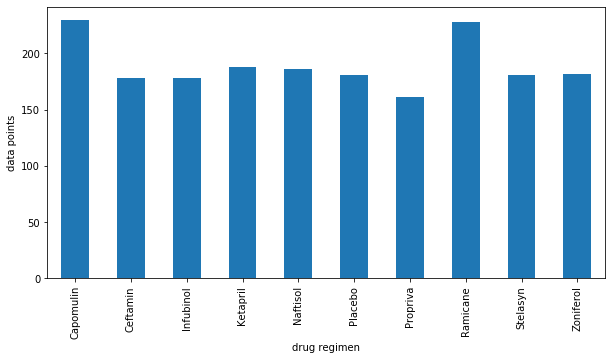

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_points = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_points
bar_points.plot(kind="bar", figsize=(10,5))
plt.xlabel("drug regimen")
plt.ylabel("data points")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

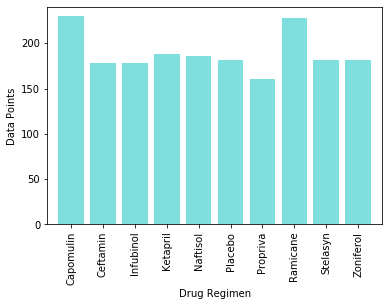

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
data_points = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(bar_points))
plt.bar(x_axis, data_points, color='c', alpha=0.5, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points)+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = merged_df.groupby(["Sex"])
gender_group

gender = pd.DataFrame(gender.groupby(["Sex"]).count())
gender.columns = ["total"]
gender["Percentage of Sex"] = (100*(gender["total"]/gender["total"].sum()))
gender["Percentage of Sex"] = gender["Percentage of Sex"]
gender

gender_group = merged_df.groupby(["Mouse ID","Sex"])
gender_group
mouse_gender_df = pd.DataFrame(groupby_gender.size())
gender_of_mouse = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
gender_of_mouse.columns = ["Total"]
gender_of_mouse

explode = (0, 0.1)
colors = ['pink', 'blue']
plot = gender_of_mouse.plot.pie(y='Total',figsize=(7,7), colors = colors, startangle=120, explode = explode, shadow = True, autopct="%1.1f%%")

NameError: name 'gender' is not defined

(-1.2276484577192428,
 1.1151108406302452,
 -1.1882449697294044,
 1.1132673136970537)

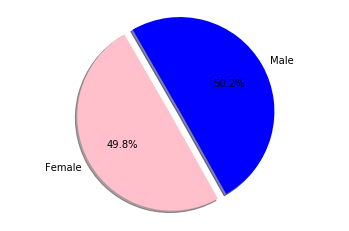

In [24]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers.
regimen = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimen = regimen.sort_values(["Timepoint"], ascending=True)
regimen
regimen_data = regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimen_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


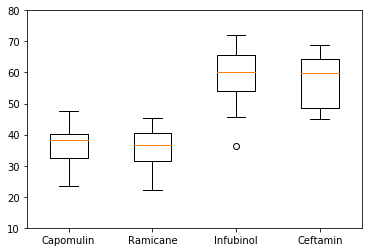

In [30]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
regimen_sort = regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
regimen_sort.head()
best_regimen_df = regimen_sort.to_frame()
best_regimen_df
best_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
df = best_regimen_df.reset_index()
tumor = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumor)
tumor_df = tumor_df.reindex(best_regimen)
tumor_vols = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=best_regimen)
plt.ylim(10, 80)
plt.show()

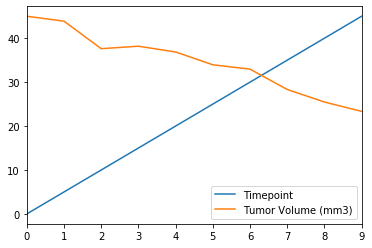

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treatment = merged_df[merged_df["Mouse ID"].isin(["s185"])]
capomulin_treatment
capomulin_treatment_data = capomulin_treatment[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
capomulin_treatment_data
line_df = capomulin_treatment_data.reset_index()
line_df
line_plot = line_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot
lines = line_plot.plot.line()

tumorvolume_list = line_plot['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot['Timepoint'].tolist()

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [36]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
